In [72]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
## directory to all datasets
DATASETS_DIR = "../datasets_text/"
BASE_DIR ="../"
train_dir = os.path.join(BASE_DIR, 'TRAIN')

test_dir =os.path.join(BASE_DIR,'TEST')


In [74]:
datasets = os.listdir(DATASETS_DIR)
del datasets[1]
datasets

['dataset28.txt',
 'dataset10.txt',
 'dataset22.txt',
 'dataset11.txt',
 'dataset13.txt',
 'dataset12.txt',
 'dataset4.txt',
 'dataset5.txt',
 'dataset3.txt',
 'dataset24.txt',
 'dataset26.txt',
 'dataset16.txt',
 'dataset8.txt',
 'dataset20.txt',
 'dataset6.txt',
 'dataset25.txt',
 'dataset1.txt',
 'dataset9.txt',
 'dataset18.txt',
 'dataset7.txt',
 'dataset15.txt',
 'dataset19.txt',
 'dataset27.txt',
 'dataset23.txt',
 'dataset2.txt',
 'dataset17.txt',
 'dataset21.txt',
 'dataset14.txt']

In [165]:
def generate_data(data_list):
    generated_data =np.zeros((2048,28),dtype=complex)
    for i,fname in enumerate(data_list):
        with open(os.path.join(DATASETS_DIR,fname)) as f:
            j=0
            for line in f:
                line = line.strip()
                if line:
                    data = line.split()
                    real_part = data[0]
                    imag_part =data[1]
                    complex_signal = complex(float(real_part),float(imag_part))
                    generated_data[j,i]=complex_signal
                j = j+1
        f.close()
    return generated_data

In [166]:
sample = generate_data(datasets)

In [187]:
sample.shape

(2048, 28)

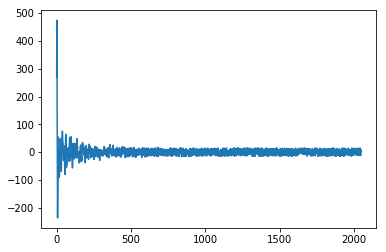

In [204]:
plt.plot(sample[:,20])

In [194]:
#Conversion from time domain to frequency domain
def td_2_fd():
    f_domain = []
    for a in np.arange(sample.shape[1]):
        fft_data =np.fft.fft(sample[:,a])
        f_domain.append(fft_data)
    return np.asarray(f_domain)

In [195]:
fft =td_2_fd()

In [197]:
fft = fft.T

In [199]:
fft.shape

(2048, 28)

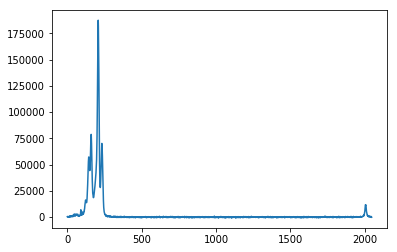

In [200]:
plt.plot((fft[:,0]))

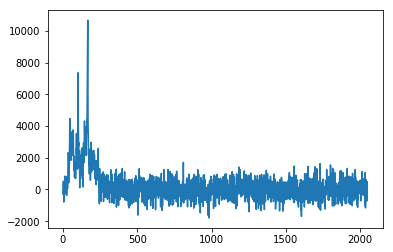

In [201]:
plt.plot(fft[:,27])

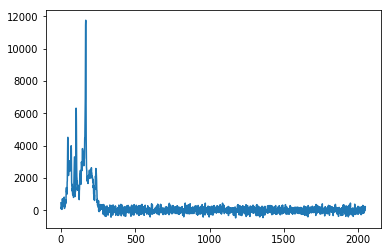

In [202]:
plt.plot(fft[:,7])